### Spark Foundation Task 1
Predict Percentage of Student based on number of study hours

In [3]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [4]:
#Reading Data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#To check the missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#Data Visualization
x = data['Hours']
y = data['Scores']

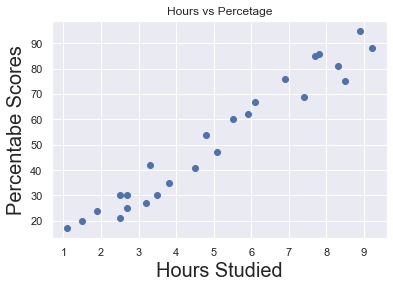

In [10]:
plt.scatter(x,y)
plt.title('Hours vs Percetage')
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentabe Scores',fontsize=20)
plt.show()

In [11]:
#Linear Regression Model
#Preparing the Data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete")

Training complete


In [14]:
x1 = sm.add_constant(X)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           9.13e-17
Time:                        09:29:26   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

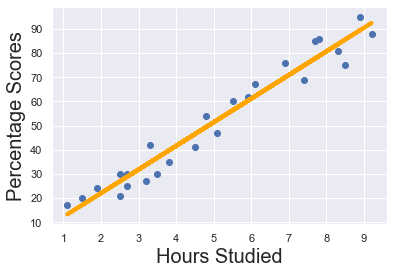

In [15]:
# plotting the regression line
plt.scatter(X,y)
yhat = 9.7758*X+2.4837
fig = plt.plot(X,yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('Hours Studied', fontsize = 20)
plt.ylabel('Percentage Scores', fontsize = 20)
plt.show()

In [18]:
#Making Prediction
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [19]:
# Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [20]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.4197278080276545


In [22]:
#Predicting the score
hours=float(input("Enter the number of hours"))
percentage = regressor.predict([[hours]])
print("Predicted percetage :", percentage)

Enter the number of hours8
Predicted percetage : [80.67934888]
